In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# # install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
data = df.values
y = data[:,0]

from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[[
#  'koi_disposition',
#  'koi_fpflag_nt',
#  'koi_fpflag_ss',
#  'koi_fpflag_co',
#  'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
#  'koi_time0bk',
#  'koi_time0bk_err1',
#  'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
#  'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag'
  ]]

selected_features["koi_disposition"] = encoded_y
selected_features

<ipython-input-6-d0d4bde70c52>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["koi_disposition"] = encoded_y


,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
0,54.418383,2.479000e-04,-2.479000e-04,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,19.899140,1.490000e-05,-1.490000e-05,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,2
2,1.736952,2.630000e-07,-2.630000e-07,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,2
3,2.525592,3.760000e-06,-3.760000e-06,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,4.134435,1.050000e-05,-1.050000e-05,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,8.589871,1.846000e-04,-1.846000e-04,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,...,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,2
6987,0.527699,1.160000e-07,-1.160000e-07,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,...,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,2
6988,1.739849,1.780000e-05,-1.780000e-05,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,...,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,0
6989,0.681402,2.430000e-06,-2.430000e-06,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,...,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,2


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
X = selected_features
y = selected_features["koi_disposition"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 33) (6991, 1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
6122,6.768901,7.380000e-05,-7.380000e-05,0.150,0.305,-0.150,3.61600,0.3060,-0.3060,123.1,...,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725,0
6370,0.733726,6.060000e-06,-6.060000e-06,0.291,0.193,-0.291,2.30900,0.2820,-0.2820,114.6,...,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770,2
2879,7.652707,6.540000e-05,-6.540000e-05,0.970,0.879,-0.942,79.89690,0.0000,0.0000,641.1,...,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099,2
107,7.953547,1.910000e-05,-1.910000e-05,0.300,0.145,-0.300,2.63120,0.0595,-0.0595,875.4,...,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660,1
29,4.959319,5.150000e-07,-5.150000e-07,0.831,0.016,-0.004,2.22739,0.0075,-0.0075,9802.0,...,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263,0


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Train the Model



In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

Training Data Score: -1.387453942474143
Testing Data Score: -1.4698947220245113


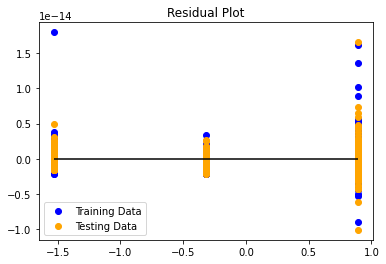

In [12]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model

In [14]:
# Train the model with GridSearch

In [15]:
print(grid2.best_params_)
print(grid2.best_score_)

NameError: name 'grid2' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)